In [40]:
import matplotlib.pyplot as plt
import pandas as pd
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import datasets
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import seaborn as sns


In [3]:
data = 'https://raw.githubusercontent.com/Adelaaas/Data_science_basic_22-23_2/main/home_work_clustering/segmentation%20data.csv'
df = pd.read_csv(data)
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


Задание 1

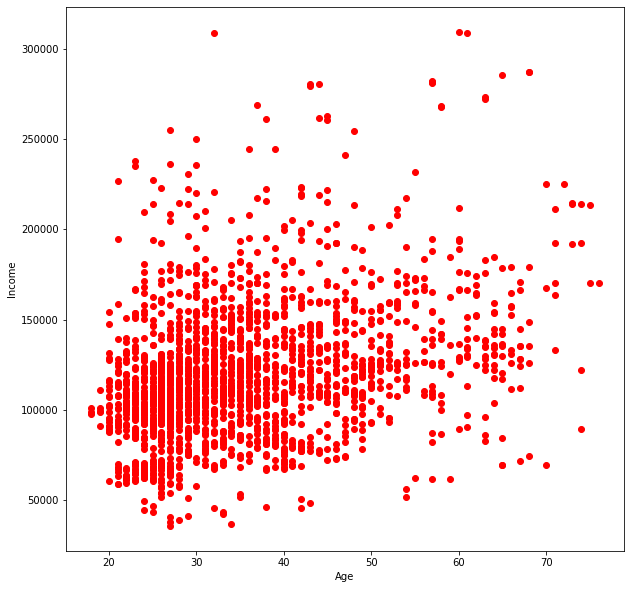

In [14]:
plt.figure(figsize=(10, 10))
plt.plot(df['Age'], df['Income'], 'ro')



plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

<Figure size 720x432 with 0 Axes>

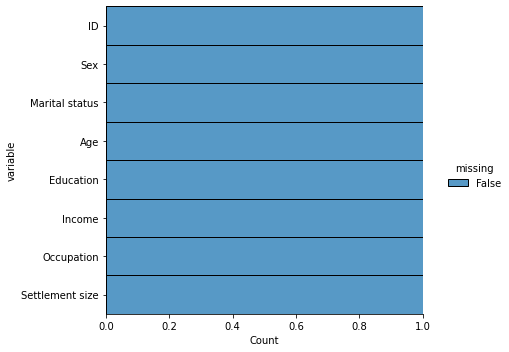

In [24]:
plt.figure(figsize=(10,6))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


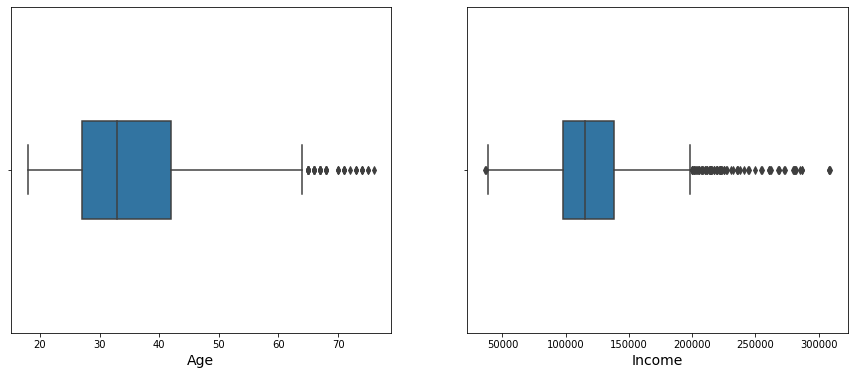

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(15,6))
sns.boxplot(df['Age'], ax=axes[0], width=0.3)
axes[0].set_xlabel("Age", fontsize=14)
axes[1].set_xlabel("Income", fontsize=14)
sns.boxplot(df['Income'], ax=axes[1], width=0.3)

Text(0.5, 0, 'Sex')

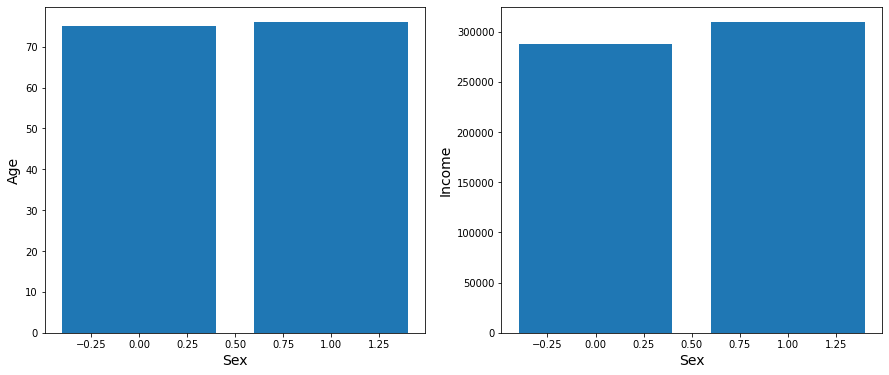

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(15,6))
axes[0].bar(df['Sex'], df["Age"])
axes[1].bar(df['Sex'], df["Income"])
axes[0].set_ylabel("Age", fontsize=14)
axes[1].set_ylabel("Income", fontsize=14)
axes[0].set_xlabel('Sex', fontsize=14)
axes[1].set_xlabel('Sex', fontsize=14)


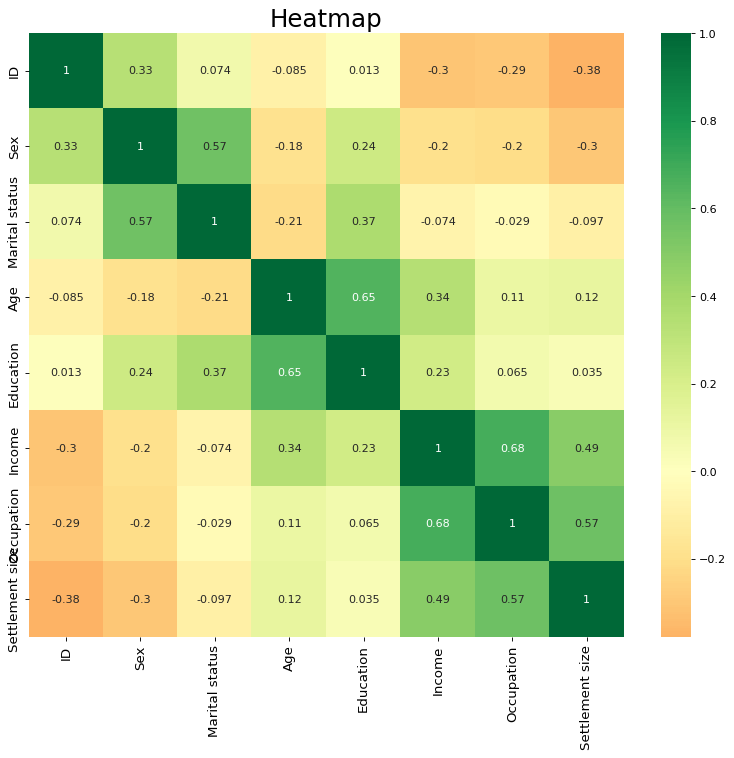

In [39]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)


plt.title('Heatmap', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Задание 2

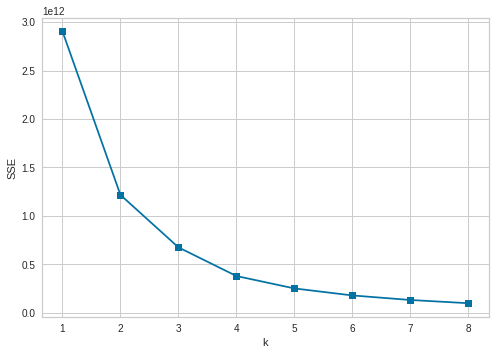

In [42]:


SSE = [] 

for k in range(1,9):
    kmeans = KMeans(n_clusters = k) # построить кластер
    kmeans.fit(df)
    SSE.append(kmeans.inertia_)
 
plt.plot(range(1,9), SSE, marker='s');
plt.xlabel('clusters')
plt.ylabel('SSE');
plt.show()
#Из графика видно, что лучше всего взять 4 кластера

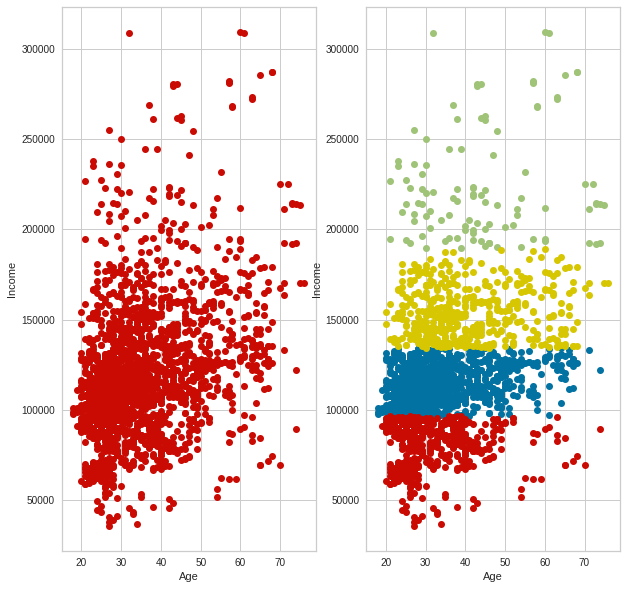

In [49]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df)
df['cluster'] = kmeans.labels_
fig, axes = plt.subplots(1, 2, figsize=(10,10))
axes[0].plot(df['Age'], df['Income'], 'ro')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Income')

axes[1].plot(df[df['cluster']==0]['Age'], df[df['cluster']==0]['Income'], 'bo', label='class1')

axes[1].plot(df[df['cluster']==1]['Age'], df[df['cluster']==1]['Income'], 'go', label='class2')

axes[1].plot(df[df['cluster']==2]['Age'], df[df['cluster']==2]['Income'], 'ro', label='class3')

axes[1].plot(df[df['cluster']==3]['Age'], df[df['cluster']==3]['Income'], 'yo', label='class3')

axes[1].set_xlabel('Age')
axes[1].set_ylabel('Income')
plt.show()

Задание 3

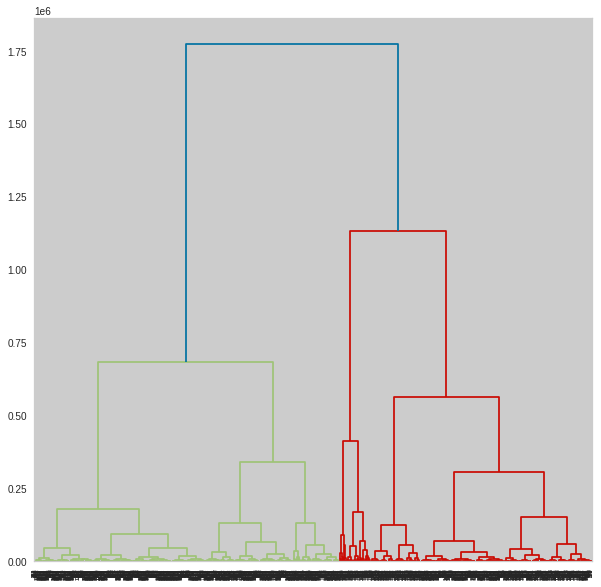

In [50]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(df, 'ward')

fig = plt.figure(figsize=(10, 10))
dn = dendrogram(Z)
#тяжело понять какое количество количество кластеров нужно взять, но на мой взгляд лучше всего взять 4 кластера

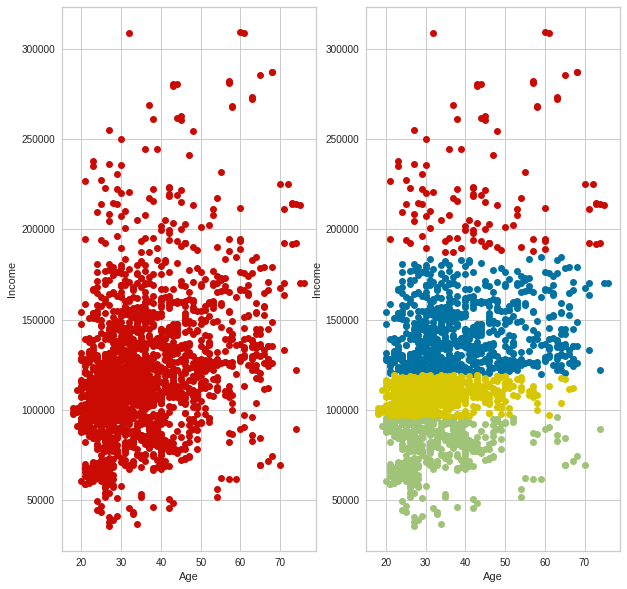

In [55]:
from sklearn.cluster import AgglomerativeClustering


hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')




df['cluster1'] = hc.fit_predict(df)
fig, axes = plt.subplots(1, 2, figsize=(10,10))
axes[0].plot(df['Age'], df['Income'], 'ro')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Income')

axes[1].plot(df[df['cluster1']==0]['Age'], df[df['cluster1']==0]['Income'], 'bo', label='class1')

axes[1].plot(df[df['cluster1']==1]['Age'], df[df['cluster1']==1]['Income'], 'go', label='class2')

axes[1].plot(df[df['cluster1']==2]['Age'], df[df['cluster1']==2]['Income'], 'ro', label='class3')

axes[1].plot(df[df['cluster1']==3]['Age'], df[df['cluster1']==3]['Income'], 'yo', label='class3')

axes[1].set_xlabel('Age')
axes[1].set_ylabel('Income')
plt.show()